<a href="https://colab.research.google.com/github/YugPatel07/Machine-Learning/blob/main/Diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df = data.loc[:,['Glucose','Insulin']]
df.head()

,Glucose,Insulin
0,148,0
1,85,0
2,183,0
3,89,94
4,137,168


In [ ]:
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc = sc.fit(new_data)
df = sc.fit_transform(new_data)
'''

In [ ]:
df =pd.DataFrame(df , columns=['Glucose','Insulin'])
df.head()

,Glucose,Insulin
0,148,0
1,85,0
2,183,0
3,89,94
4,137,168


In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    cls = KMeans(n_clusters = i, random_state = 0)
    cls.fit(df)

    wcss.append(cls.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

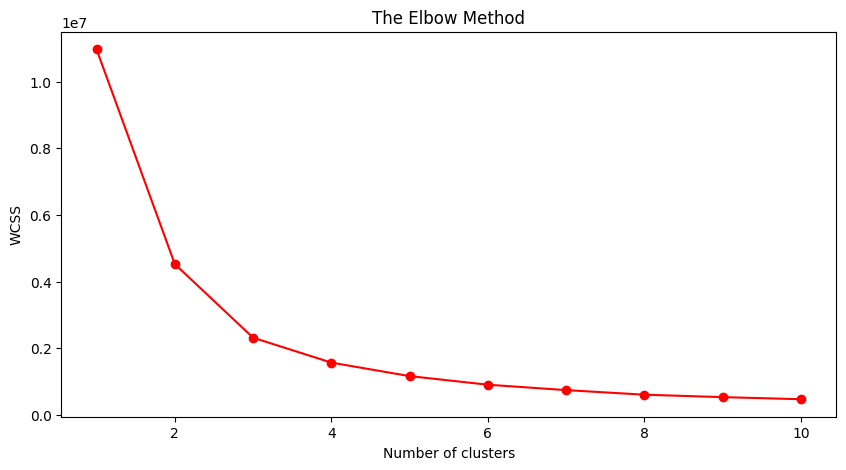

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss ,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

hc = KMeans(n_clusters = 4)
label = hc.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df["label"] = label
df.head()

,Glucose,Insulin,label
0,148,0,0
1,85,0,0
2,183,0,0
3,89,94,3
4,137,168,1


In [ ]:
df.label.value_counts()

0    407
3    220
1    117
2     24
Name: label, dtype: int64

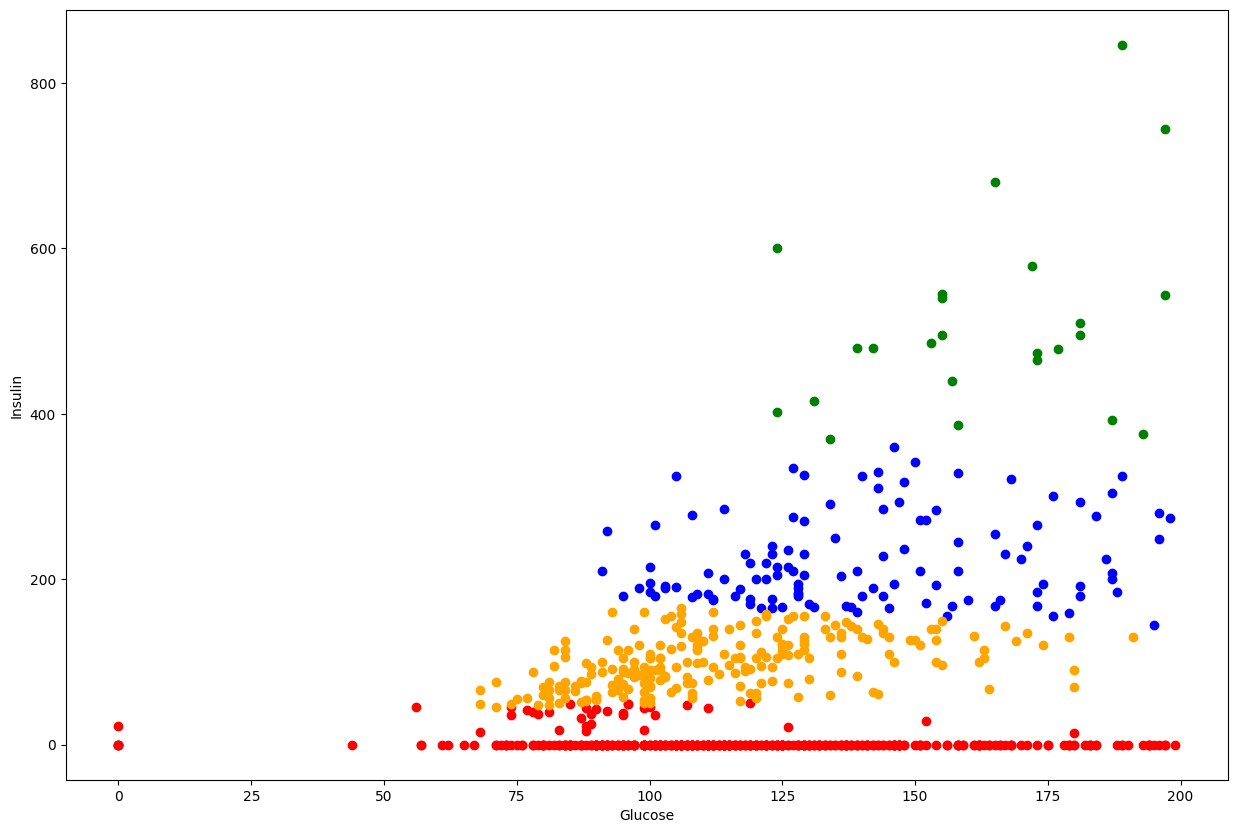

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(df["Glucose"][df.label == 0], df["Insulin"][df.label == 0], color = "red")
plt.scatter(df["Glucose"][df.label == 1], df["Insulin"][df.label == 1], color = "blue")
plt.scatter(df["Glucose"][df.label == 2], df["Insulin"][df.label == 2], color = "green")
plt.scatter(df["Glucose"][df.label == 3], df["Insulin"][df.label == 3], color = "orange")
#plt.scatter(df["Glucose"][df.label == 4], df["Insulin"][df.label == 4], color = "yellow")
#plt.scatter(df["Glucose"][df.label == 5], df["Insulin"][df.label == 5], color = "violet")


plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score_agg = silhouette_score(df, label)
score_agg

0.5290107389201618

# **Hierarchial Clustering**

In [ ]:
newdf = df.copy()

newdf.head()

,Glucose,Insulin,label
0,148,0,4
1,85,0,2
2,183,0,4
3,89,94,0
4,137,168,0


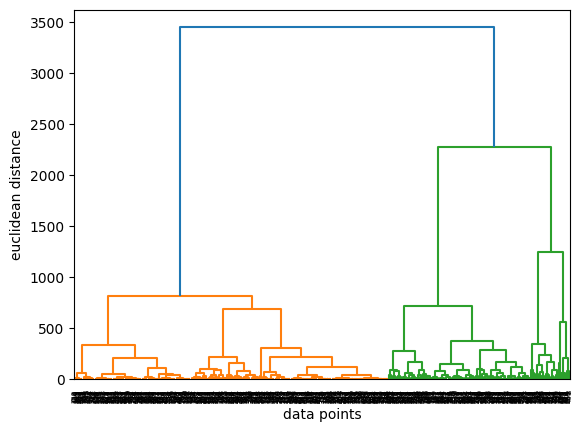

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(newdf, method = "ward")


dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =5, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(newdf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
newdf["label"] = cluster
newdf.head()

,Glucose,Insulin,label
0,148,0,4
1,85,0,2
2,183,0,4
3,89,94,0
4,137,168,0


In [ ]:
newdf.label.value_counts()

2    306
0    220
4    180
3     44
1     18
Name: label, dtype: int64

In [ ]:
score_agg = silhouette_score(newdf, cluster)
score_agg

0.4074203926143181

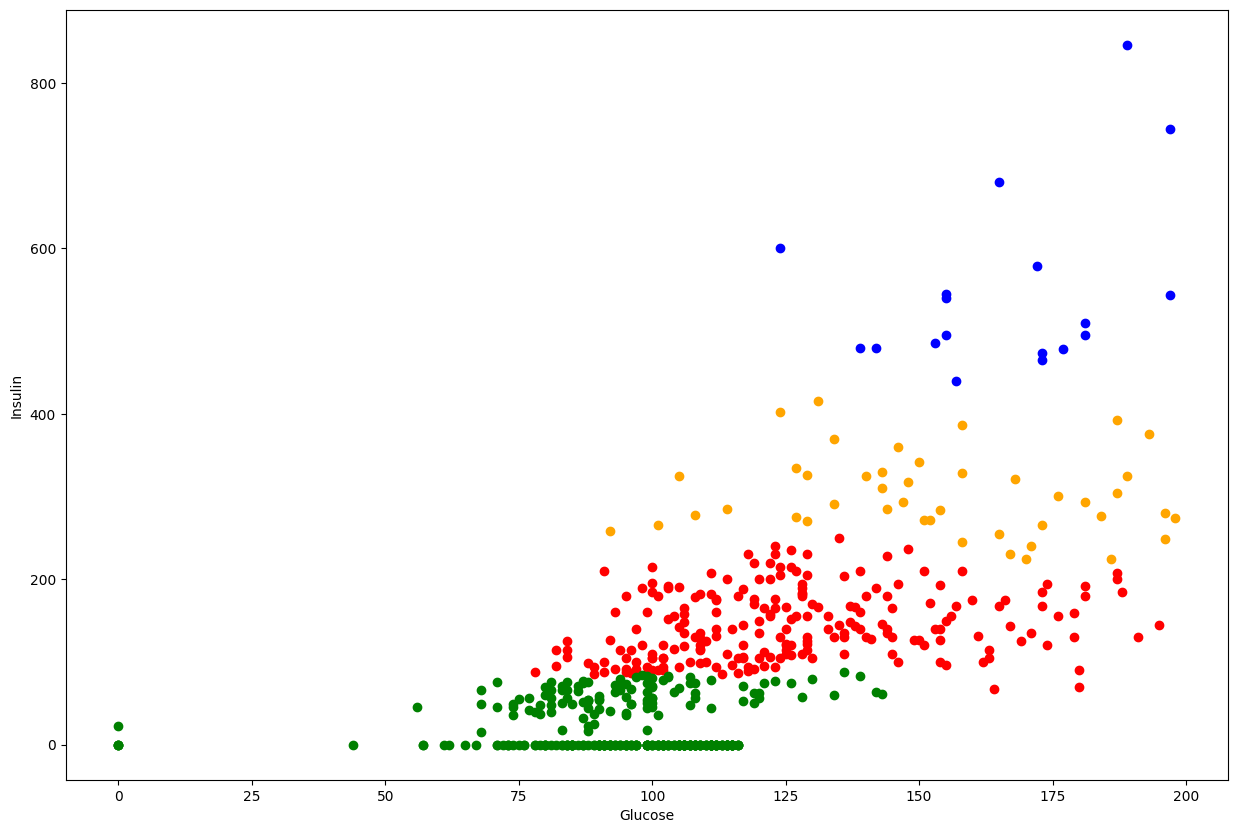

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(newdf["Glucose"][newdf.label == 0], newdf["Insulin"][newdf.label == 0], color = "red")
plt.scatter(newdf["Glucose"][newdf.label == 1], newdf["Insulin"][newdf.label == 1], color = "blue")
plt.scatter(newdf["Glucose"][newdf.label == 2], newdf["Insulin"][newdf.label == 2], color = "green")
plt.scatter(newdf["Glucose"][newdf.label == 3], newdf["Insulin"][newdf.label == 3], color = "orange")
#plt.scatter(df["Glucose"][df.label == 4], df["Insulin"][df.label == 4], color = "yellow")
#plt.scatter(df["Glucose"][df.label == 5], df["Insulin"][df.label == 5], color = "violet")


plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()